In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import copy
# from sklearn.utils import check_arrays

In [2]:
df=pd.read_csv("AdmissionDataset/data.csv")
df
X =df.drop(['Chance of Admit ','Serial No.'],axis=1)
y=df['Chance of Admit ']


*Standardizing consists in subtracting the mean and dividing by the standard deviation.*
*The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.*
*when value are largely diffrent one is population and some other attribute is fraction*

In [3]:
X = (X - X.mean())/X.std()#normalize the data(z-mu)/(sigma)
# y=(y-y.mean())/y.std()
#kyuki actual y ke paas pahuchna hai isliye ,jhe y ko normalize karne ka koi reason nahi lag raha

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
my_data=pd.concat([X_train,y_train],axis=1)

In [5]:
X=X_train

In [6]:
ones = np.ones([X.shape[0],1])


In [7]:
X = np.concatenate((ones,X),axis=1)


*values converts it from pandas.core.frame.DataFrame to numpy.ndarray*

In [8]:
y
y=pd.DataFrame(y_train)
y=y.values

*basically assumed m=0 and c=0 for each independent variable intially*

In [9]:
#set hyper parameters
alpha = 0.00001

In [10]:
def meanSquareError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred)))

*no of times we have to iterate to minimize rms*

In [11]:
iters = 1000000
lamda=100
itr=0

cost=[]

In [12]:
def gradientDescent(X,y,theta,iters,alpha,lamda):
    for i in range(iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        theta1=np.sign(theta1)
#         for i in range(1,8):
#             if theta1[]
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)+(0.5*(theta1*lamda)))
    return theta

In [13]:
# X_train

In [14]:
# X

In [15]:
# lam=[.00001,.0001,.001,.01,.1,5,10,15,20,25,100000000500]
lam=[]
lamda=100000
error_list=[]
preverror=10000000000000
ans=lamda
flag=0
prev=-1
while lamda>0.0000001:
    lam.append(lamda)
    ridgereg = Lasso(alpha=lamda,max_iter=10000)
    ridgereg.fit(X_train,y)
    lamda=lamda/10
    y_pred = ridgereg.predict(X_test)
    error_list.append((1-r2_score(y_test, y_pred)))
    
    if (1-r2_score(y_test, y_pred)) < preverror:
        ans=lamda*10
#     prev=lamda
    preverror=(1-r2_score(y_test, y_pred))

In [16]:
print("ans ",ans)


ans  1.0000000000000002e-07


[100000, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07]


Text(0.5, 1.0, 'Lamda vs Error')

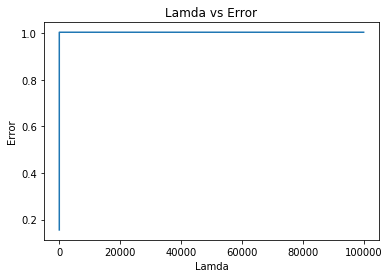

In [17]:
fig, ax = plt.subplots()
print(lam)
ax.plot(lam,error_list)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [18]:
error_list

[1.0047401130604747,
 1.0047401130604747,
 1.0047401130604747,
 1.0047401130604747,
 1.0047401130604747,
 1.0047401130604747,
 0.7513004304541403,
 0.17512398260842943,
 0.15658607327333718,
 0.15553043487490537,
 0.1554307880064998,
 0.15542131369762213,
 0.1554204417757874]

In [19]:
lamda=100000
lam=[]
# lam=[.00001,.0001,.001,.01,.1,5,10,15,20,25,500,1000,1200,1500,2000,2500,3000,3500]
error_list=[]
preverror=1000000000
ans=lamda
flag=0
# prev=-1
while lamda>0.000001:
    theta = np.zeros([1,8])
    lam.append(lamda)
    g = gradientDescent(X,y,theta,iters,alpha,lamda)
    lamda=lamda/10
    betaList=g[0]
    y_pred1=[]
    ones=np.ones([X_test.shape[0],1])
    X_tr2 = np.concatenate((ones,X_test),axis=1)
    y_pred1=X_tr2@betaList
    error_list.append((1-r2_score(y_test, y_pred1)))
    
    if (1-r2_score(y_test, y_pred1)) < preverror:
        ans=lamda*10
#     prev=lamda
    preverror=(1-r2_score(y_test, y_pred1))
    print("error ",meanSquareError(y_test, y_pred1))

error  0.02163220250816287
error  0.021255085945178435
error  0.021199236028817126
error  0.02119641955615298
error  0.003846768781678424
error  0.003232510102805594
error  0.003203445448041954
error  0.003200862594696751
error  0.00320060754548356
error  0.003200582072923675
error  0.0032005795259910873
error  0.003200579271301128


In [20]:
print("ans ",ans)
print(error_list)
print(lam)

ans  1.0000000000000002e-06
[1.025390856357716, 1.0075151049024786, 1.004867755722772, 1.0047342517341742, 0.18234118942659405, 0.15322463356424498, 0.15184693606781186, 0.15172450589906306, 0.15171241627799792, 0.15171120884986, 0.15171108812237577, 0.15171107604978373]
[100000, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06]


[1.025390856357716, 1.0075151049024786, 1.004867755722772, 1.0047342517341742, 0.18234118942659405, 0.15322463356424498, 0.15184693606781186, 0.15172450589906306, 0.15171241627799792, 0.15171120884986, 0.15171108812237577, 0.15171107604978373]


Text(0.5, 1.0, 'Lamda vs Error')

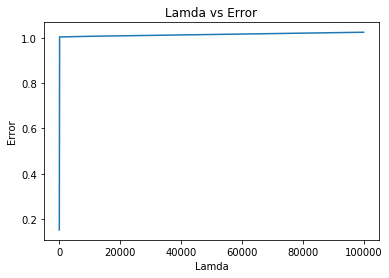

In [21]:
fig, ax = plt.subplots()
print(error_list)
# print(lam)
ax.plot(lam,error_list)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [22]:
error_list

[1.025390856357716,
 1.0075151049024786,
 1.004867755722772,
 1.0047342517341742,
 0.18234118942659405,
 0.15322463356424498,
 0.15184693606781186,
 0.15172450589906306,
 0.15171241627799792,
 0.15171120884986,
 0.15171108812237577,
 0.15171107604978373]